In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/DATASET_ML/gurgaon_properties_post_feature_selection.csv")
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48


In [18]:
# Implementing the OneHotEncoder into this columns:
# sector, balcony, agePossession, furnishingType, luxuryCategory floorCategory.

X = df.drop(columns=['price'])
y = df['price']

In [19]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [20]:
# Columns to encode.
columns_to_encode = []
for col in X.columns:
    if col == 'sector' or col == 'balcony' or col == 'agePossession' or col =='furnishing_type' or col == 'luxury_category' or col == 'floor_category':
        columns_to_encode.append(col)
    else:
        continue

# columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']
columns_to_encode

['sector',
 'balcony',
 'agePossession',
 'furnishing_type',
 'luxury_category',
 'floor_category']

In [21]:
df['price']

,price
0,0.82
1,0.95
2,0.32
3,1.60
4,0.48
...,...
3549,0.37
3550,6.00
3551,0.60
3552,15.50


<Axes: xlabel='price', ylabel='Count'>

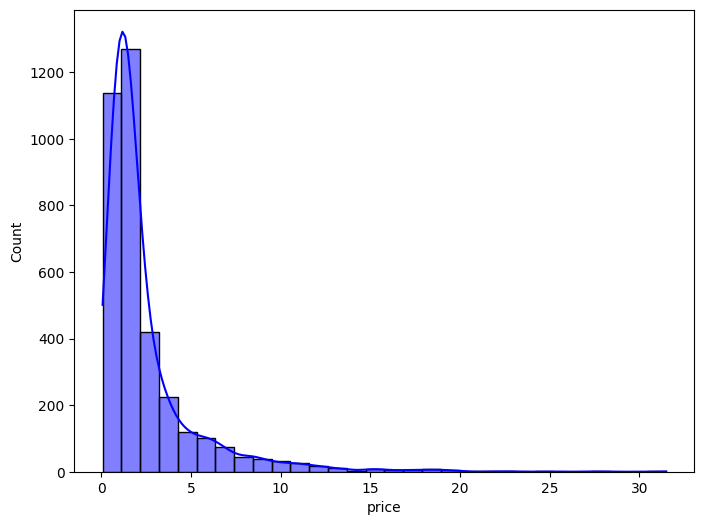

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='blue', bins=30)

In [23]:
# Since the price columns or target feature looks right skewed so need some kind of the transformations such as log1.
y_transformed = np.log1p(y)
y_transformed

,price
0,0.598837
1,0.667829
2,0.277632
3,0.955511
4,0.392042
...,...
3549,0.314811
3550,1.945910
3551,0.470004
3552,2.803360


<Axes: xlabel='price', ylabel='Count'>

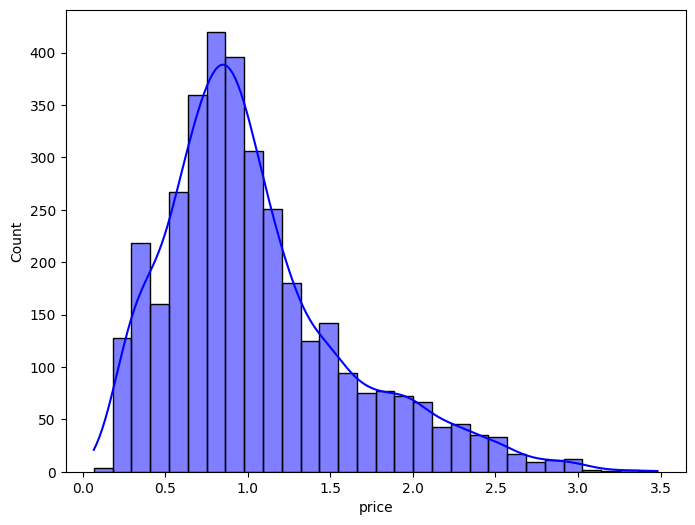

In [24]:
# Graphs after transformation.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(y_transformed, kde=True, color='blue', bins=30)

Conclusion:

From above figure, after applying the `log1p` transformation, we can make the conclusion that,  the value of the price columns are in the range of -3 to 3 which looks perfect for the predictions.

In [25]:
# Now, Creating a ColumnTransfomer for preprocessing.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ],
    remainder='passthrough' # neglecting or skipping the other columns except mentioned.
)

# Creating a pipeline.
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

# Implementing the K-Fold Cross Validation.
kfold = KFold(n_splits = 10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
scores.mean(), scores.std()

(0.8845360715052788, 0.014784881452419891)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, random_state=42)

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [28]:
y_pred = pipeline.predict(X_test)

In [30]:
y_pred = np.expm1(y_pred)

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test), y_pred)

0.5351174192501691